# AdD Trabajo Práctico Final CEIA 17Co2024
## Autores: Joaquín Matías Mestanza, Gonzalo Nicolas Silva Caggiano, Ramiro Andrés Feichubuinm

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
df = pd.read_csv("weatherAUS.csv")
print(df.shape)
df.head()

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [58]:
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
60003,2014-04-04,Bendigo,13.2,22.7,0.0,3.2,NaN,SSE,43.0,SSE,...,72.0,51.0,1019.4,1017.8,NaN,6.0,14.2,21.5,No,No
117100,2016-01-14,PearceRAAF,16.3,34.5,0.0,NaN,13.2,E,63.0,E,...,40.0,19.0,1022.9,1018.2,NaN,NaN,22.0,32.9,No,No
66279,2014-12-18,MelbourneAirport,9.2,24.4,0.0,7.2,7.0,SW,74.0,NW,...,34.0,23.0,1005.8,1005.4,1.0,7.0,20.5,23.5,No,Yes
87244,2009-01-14,Cairns,23.7,30.9,0.0,6.0,11.7,NE,30.0,SE,...,69.0,66.0,1006.9,1005.5,1.0,1.0,28.9,30.2,No,No
125421,2013-08-15,SalmonGums,2.6,19.6,0.0,NaN,NaN,NW,57.0,NW,...,68.0,45.0,NaN,NaN,NaN,NaN,13.1,17.9,No,Yes
48383,2015-09-25,Canberra,0.5,14.9,0.0,NaN,NaN,SSW,50.0,S,...,62.0,48.0,1031.8,1029.0,7.0,8.0,10.2,14.4,No,No
5597,2016-03-31,BadgerysCreek,11.4,26.7,0.2,NaN,NaN,ESE,26.0,NNE,...,74.0,40.0,1017.3,1015.6,NaN,NaN,17.3,25.6,No,No
83373,2015-10-01,Dartmoor,1.5,18.9,0.0,1.4,8.2,WSW,31.0,N,...,77.0,70.0,1027.2,1028.0,NaN,NaN,12.2,16.8,No,No
71556,2012-04-08,Mildura,6.5,21.4,0.0,3.4,5.8,WSW,35.0,S,...,64.0,32.0,1021.5,1019.0,7.0,7.0,13.7,20.6,No,No
111390,2016-11-17,Albany,12.2,19.0,0.8,4.2,NaN,NaN,NaN,W,...,58.0,NaN,1021.2,1021.2,7.0,NaN,16.2,NaN,No,No


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [11]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [19]:
locations = df['Location'].unique()
locations

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [23]:
from geopy.geocoders import Nominatim
import folium
import time

In [45]:
geolocator = Nominatim(user_agent="myGeocoderApp")

coordinates = {}

for location in unique_locations:
    coords = geolocator.geocode(location)
    if location:
        coordinates[location] = (coords.latitude, coords.longitude)
    else:
        print(location + " no fue encontrada.")
    
    # Se añade un retraso para evitar exceder los límites de solicitudes
    time.sleep(1)  # Espera 1 segundo entre solicitudes

BadgerysCreek no fue encontrada.
CoffsHarbour no fue encontrada.
NorahHead no fue encontrada.
NorfolkIsland no fue encontrada.
SydneyAirport no fue encontrada.
WaggaWagga no fue encontrada.
MountGinini no fue encontrada.
MelbourneAirport no fue encontrada.
MountGambier no fue encontrada.
PearceRAAF no fue encontrada.
PerthAirport no fue encontrada.
SalmonGums no fue encontrada.
AliceSprings no fue encontrada.


Nominatim puede generar alguno de los siguientes problemas:

- Código de error HTTP 403 por la cantidad de solicitudes realizadas.
- Puede no encontrar la ubicación por no tratarse de una ciudad.
- Puede no encontrar la ubicación por no tener el formato solicitado.

Se procedió a conseguir las coordenadas de forma manual:

In [25]:
coordinates = {
    'Albury': (-36.0801, 146.9128),
    'BadgerysCreek': (-33.8972, 150.6921),
    'Cobar': (-31.8495, 145.7791),
    'CoffsHarbour': (-30.2974, 153.1135),
    'Moree': (-29.4572, 149.8463),
    'Newcastle': (-32.9272, 151.7784),
    'NorahHead': (-33.2828, 151.5470),
    'NorfolkIsland': (-29.0331, 167.9590),
    'Penrith': (-33.7555, 150.6944),
    'Richmond': (-33.5951, 150.7350),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9399, 151.1753),
    'WaggaWagga': (-35.1084, 147.3737),
    'Williamtown': (-32.8153, 151.8314),
    'Wollongong': (-34.4278, 150.8931),
    'Canberra': (-35.2809, 149.1300),
    'Tuggeranong': (-35.4200, 149.1264),
    'MountGinini': (-35.5511, 148.7956),
    'Ballarat': (-37.5643, 143.8503),
    'Bendigo': (-36.7580, 144.2808),
    'Sale': (-38.1014, 147.0668),
    'MelbourneAirport': (-37.6734, 144.8430),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.1900, 142.1340),
    'Nhil': (-36.3200, 140.6900),
    'Portland': (-38.3519, 141.6008),
    'Watsonia': (-37.7246, 145.0962),
    'Dartmoor': (-37.5667, 141.3500),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9186, 145.7780),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2588, 146.8183),
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8300, 140.7670),
    'Nuriootpa': (-34.4825, 139.0668),
    'Woomera': (-30.4700, 136.8200),
    'Albany': (-35.0285, 117.8836),
    'Witchcliffe': (-33.8500, 115.0667),
    'PearceRAAF': (-31.8550, 115.9600),
    'PerthAirport': (-31.9300, 115.9660),
    'Perth': (-31.9505, 115.8605),
    'SalmonGums': (-32.2261, 121.7594),
    'Walpole': (-34.9700, 115.6000),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4332, 147.1384),
    'AliceSprings': (-23.6980, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4654, 132.2811),
    'Uluru': (-25.3444, 131.0369)
}

In [43]:
coord_values = [coords for coords in coordinates.values()]

# Calcular el centroide
mean_latitude = sum(lat for lat, lon in coord_values) / len(coord_values)
mean_longitude = sum(lon for lat, lon in coord_values) / len(coord_values)

# Crear el mapa centrado en el centroide
mymap = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=4)

# Graficar ciudades
for city, (lat, lon) in coordinates.items():
    if lat is not None and lon is not None:
        folium.Marker([lat, lon], popup=city).add_to(mymap)

De esta forma se puede ahora visualizar la cercanía entre ubicaciones, así también como su disposición geográfica.

- La primer relación es importante ya que es bastante verosimil que dos lugares cercanos experimenten lluvias simultáneamente o por lo menos, de forma cercana en el tiempo.
- La segunda de ellas es importante, ya que la altitud o la cercanía a zonas montañosas (en donde las nubes suelen descargar su humedad) así como también la cercanía al mar, pueden ser buenos indicadores, dadas ciertas condiciones, de que puede llover.

In [44]:
mymap

Otro tipo de análisis, es sobre cada ubicación de forma independiente, tratando a los datos como parte de una serie temporal donde cada observación es un valor en el tiempo:

In [46]:
# Crear un diccionario para almacenar DataFrames por ubicación
dfs_by_location = {location: df[df['Location'] == location].copy() for location in locations}

# Se elimina la columna 'Location' ya que es redundante
for location in dfs_by_location:
    dfs_by_location[location].drop(columns=['Location'], inplace=True)

A continuación se muestran solo algunos de los resultados y para un período reducido en el tiempo, con el fin de que se pueda apreciar la información que proporcionan los gráficos a modo de ejemplo:

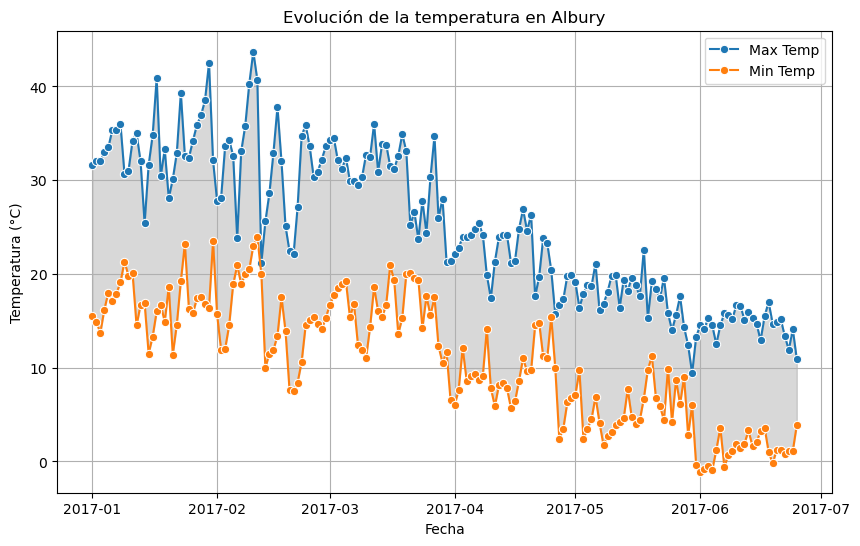

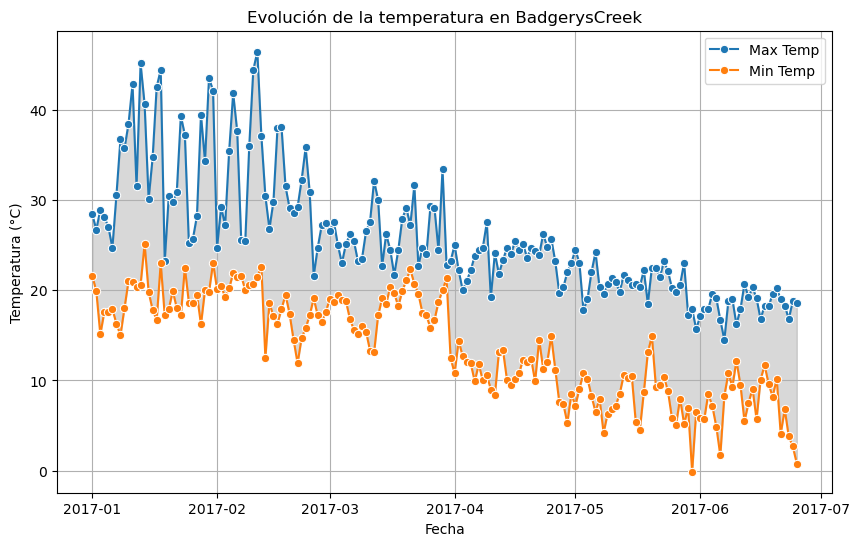

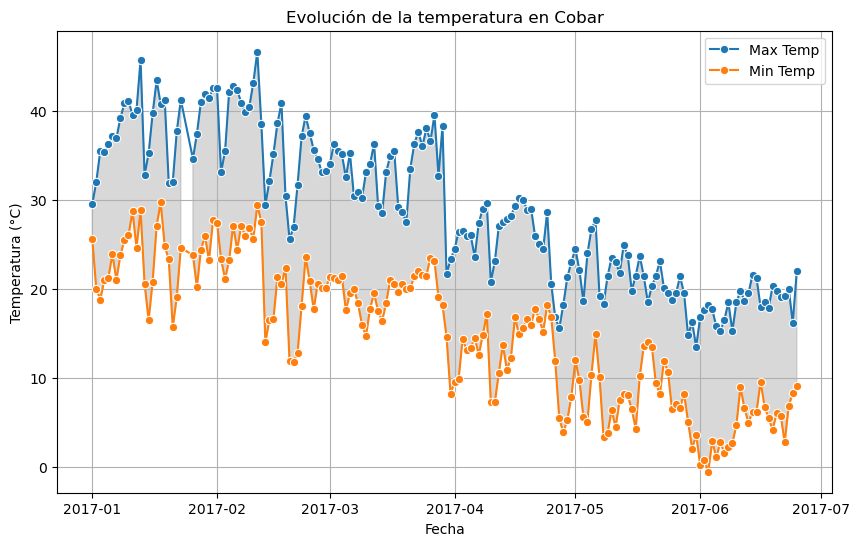

In [52]:
import seaborn as sns

# Se define un intervalo arbitrario
start_date = '2017-01-01'
end_date = '2017-12-31'

# Se usan las primeras 3 ubicaciones
locations_to_plot = list(dfs_by_location.keys())[:3]

for location in locations_to_plot:
    location_df = dfs_by_location[location]
    
    plt.figure(figsize=(10, 6))
    
    # Se convierte la columna 'Date' a tipo datetime
    location_df['Date'] = pd.to_datetime(location_df['Date'])
    
    # Se ordena por fecha
    location_df = location_df.sort_values(by='Date')
    
    # Se filtra por el rango de fechas
    location_df = location_df[(location_df['Date'] >= start_date) & (location_df['Date'] <= end_date)]
    
    sns.lineplot(data=location_df, x='Date', y='MaxTemp', label='Max Temp', marker='o')
    sns.lineplot(data=location_df, x='Date', y='MinTemp', label='Min Temp', marker='o')

    # Se agrega sombreado para los valores medios de temperatura
    plt.fill_between(location_df['Date'], location_df['MinTemp'], location_df['MaxTemp'], color='gray', alpha=0.3)
    
    plt.title(f'Evolución de la temperatura en {location}')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid(True)
    
    # Guardar la gráfica en un archivo
    # plt.savefig(f'{location}_temperature_evolution_seaborn.png')
    # plt.show()


También, nuevamente a modo de ejemplo, se incluye el gráfico de otras variables:

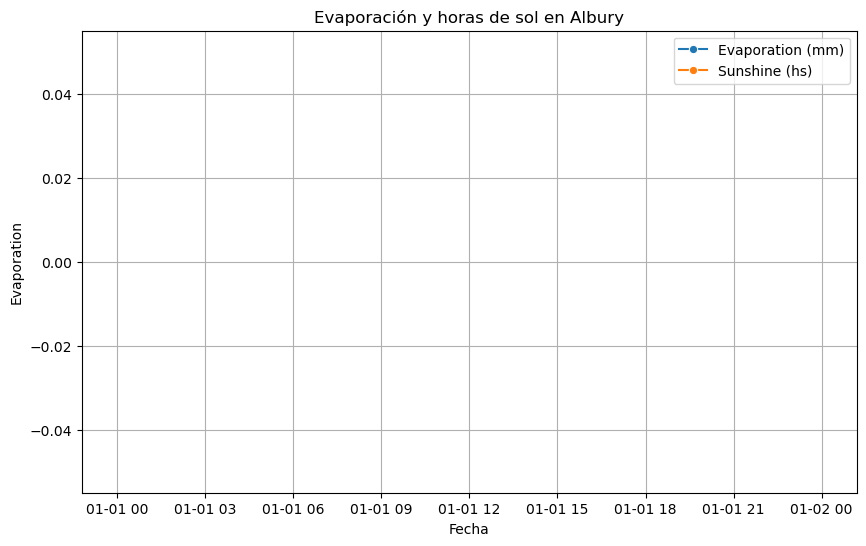

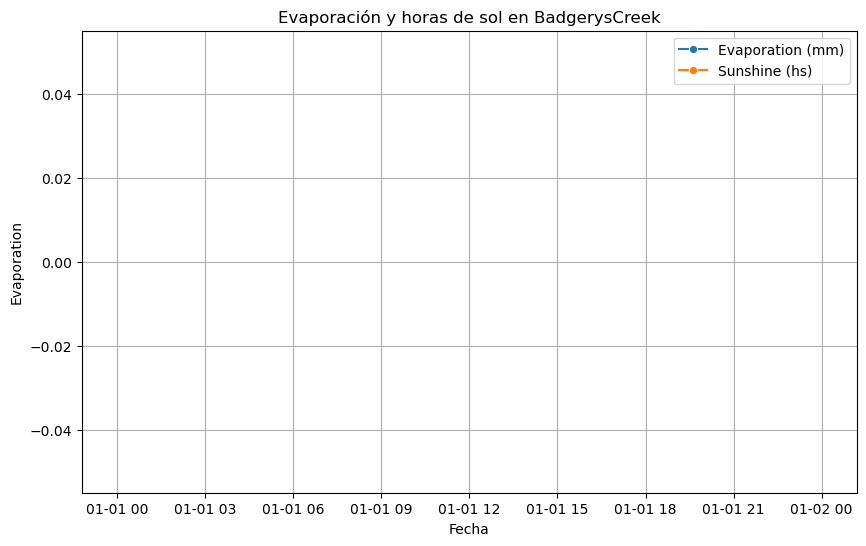

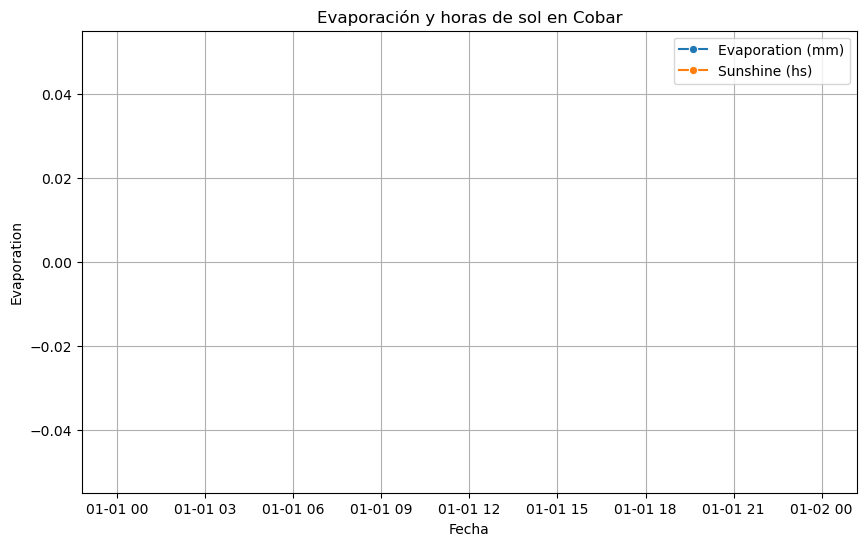

In [57]:
for location in locations_to_plot:
    location_df = dfs_by_location[location]
    
    plt.figure(figsize=(10, 6))
    
    # Se convierte la columna 'Date' a tipo datetime
    location_df['Date'] = pd.to_datetime(location_df['Date'])
    
    # Se ordena por fecha
    location_df = location_df.sort_values(by='Date')
    
    # Se filtra por el rango de fechas
    location_df = location_df[(location_df['Date'] >= start_date) & (location_df['Date'] <= end_date)]
    
    sns.lineplot(data=location_df, x='Date', y='Evaporation', label='Evaporation (mm)', marker='o')
    sns.lineplot(data=location_df, x='Date', y='Sunshine', label='Sunshine (hs)', marker='o')
    
    plt.title(f'Evaporación y horas de sol en {location}')
    plt.xlabel('Fecha')
    # plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid(True)
    
    # Guardar la gráfica en un archivo
    # plt.savefig(f'{location}_temperature_evolution_seaborn.png')
    # plt.show()


